In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('sum_data.csv')
data.head()

,index,reviewText,rating,summary,helpful,helped,unhelped
0,0,We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,"[0, 0]",0,0
1,1,The cable is very wobbly and sometimes disconn...,2.0,Cheap proprietary scam,"[0, 0]",0,0
2,2,It does 2A and charges a DEAD Nook in a few ho...,3.0,This is the oem charger you get with the nook hd+,"[0, 0]",0,0
3,3,This adaptor is real easy to setup and use rig...,5.0,A Perfdect Nook HD+ hook up,"[0, 0]",0,0
4,4,This adapter easily connects my Nook HD 7&#34;...,4.0,A nice easy to use accessory.,"[0, 0]",0,0


(array([ 108725.,   82139.,  142257.,  347041., 1009026.]),
 array([1. , 1.8, 2.6, 3.4, 4.2, 5. ]),
 <a list of 5 Patch objects>)

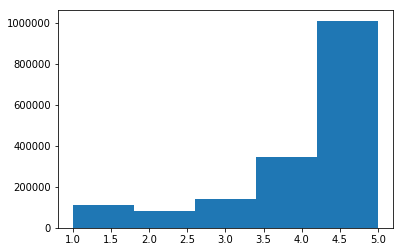

In [3]:
plt.hist(data['rating'], bins = 5)

In [4]:
mean = data['rating'].mean()
std = data['rating'].std()
print("mean",mean)
print("stdev",std)

mean 4.222779228836577
stdev 1.1856317977886985


In [5]:
data['score'] = np.where(data['rating']<mean-std, 0, 1)
data.head()

,index,reviewText,rating,summary,helpful,helped,unhelped,score
0,0,We got this GPS for my husband who is an (OTR)...,5.0,Gotta have GPS!,"[0, 0]",0,0,1
1,1,The cable is very wobbly and sometimes disconn...,2.0,Cheap proprietary scam,"[0, 0]",0,0,0
2,2,It does 2A and charges a DEAD Nook in a few ho...,3.0,This is the oem charger you get with the nook hd+,"[0, 0]",0,0,0
3,3,This adaptor is real easy to setup and use rig...,5.0,A Perfdect Nook HD+ hook up,"[0, 0]",0,0,1
4,4,This adapter easily connects my Nook HD 7&#34;...,4.0,A nice easy to use accessory.,"[0, 0]",0,0,1


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
splt = data['reviewText'][0].split('. ')
splt

['We got this GPS for my husband who is an (OTR) over the road trucker',
 ' Very Impressed with the shipping time, it arrived a few days earlier than expected..',
 ' within a week of use however it started freezing up..',
 'could of just been a glitch in that unit',
 ' Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option',
 '(the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory',
 " Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that's just my luck",
 ' I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!']

In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(splt)

In [9]:
a = X.toarray()
a

array([[0.        , 0.        , 0.        , 0.23971046, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.20685045, 0.        , 0.        ,
        0.28602402, 0.28602402, 0.        , 0.        , 0.        ,
        0.28602402, 0.        , 0.        , 0.        , 0.        ,
        0.20685045, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.20685045, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.28602402,
        0.28602402, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.28602402, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.14292928, 0.28

In [10]:
word = vectorizer.get_feature_names()
print(vectorizer.get_feature_names())

['about', 'addresses', 'all', 'an', 'and', 'around', 'arrived', 'as', 'back', 'bad', 'been', 'big', 'bigger', 'but', 'coming', 'contacted', 'could', 'days', 'does', 'earlier', 'ease', 'ect', 'email', 'exception', 'exchange', 'expected', 'few', 'for', 'freezing', 'glitch', 'got', 'gps', 'great', 'have', 'however', 'husband', 'impressed', 'in', 'instructions', 'into', 'is', 'it', 'just', 'love', 'luck', 'memory', 'million', 'minutes', 'my', 'normal', 'nothing', 'of', 'one', 'option', 'otr', 'over', 'person', 'probably', 'putting', 'really', 'received', 'road', 'routes', 'say', 'scale', 'screen', 'seller', 'shipping', 'started', 'tells', 'than', 'that', 'the', 'this', 'time', 'to', 'truck', 'trucker', 'unit', 'up', 'use', 'very', 'way', 'we', 'week', 'well', 'when', 'which', 'who', 'will', 'with', 'within', 'work', 'worked', 'you']


In [11]:
# word : column index
vectorizer.vocabulary_

{'we': 83,
 'got': 30,
 'this': 73,
 'gps': 31,
 'for': 27,
 'my': 48,
 'husband': 35,
 'who': 88,
 'is': 40,
 'an': 3,
 'otr': 54,
 'over': 55,
 'the': 72,
 'road': 61,
 'trucker': 77,
 'very': 81,
 'impressed': 36,
 'with': 90,
 'shipping': 67,
 'time': 74,
 'it': 41,
 'arrived': 6,
 'few': 26,
 'days': 17,
 'earlier': 19,
 'than': 70,
 'expected': 25,
 'within': 91,
 'week': 84,
 'of': 51,
 'use': 80,
 'however': 34,
 'started': 68,
 'freezing': 28,
 'up': 79,
 'could': 16,
 'just': 42,
 'been': 10,
 'glitch': 29,
 'in': 37,
 'that': 71,
 'unit': 78,
 'worked': 93,
 'great': 32,
 'when': 86,
 'will': 89,
 'work': 92,
 'normal': 49,
 'person': 56,
 'as': 7,
 'well': 85,
 'but': 13,
 'does': 18,
 'have': 33,
 'option': 53,
 'big': 11,
 'truck': 76,
 'routes': 62,
 'tells': 69,
 'you': 94,
 'scale': 64,
 'coming': 14,
 'ect': 21,
 'love': 43,
 'bigger': 12,
 'screen': 65,
 'ease': 20,
 'putting': 58,
 'addresses': 1,
 'into': 39,
 'memory': 45,
 'nothing': 50,
 'really': 59,
 'bad': 9,